In [2]:
!pip install linearmodels
!pip install matplotlib
!pip install xlrd
!pip install openpyxl

You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Sources
* [Panel data regression](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)
* [How to build a pooled OLS regression model for panel datasets](https://towardsdatascience.com/how-to-build-a-pooled-ols-regression-model-for-panel-data-sets-a78358f9c2a)
* [Pandas for panel data](https://python.quantecon.org/pandas_panel.html)


In [3]:
import pandas as pd
from linearmodels import PooledOLS
import statsmodels.api as sm
import numpy as np

# Descriptive statistics about state-owned and privately owned banks

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_excel('Edited_Bank_lending_data_2016_fixed.xls', sheet_name="Bank lending")

In [9]:
df.head()

,Bank,Year,STATE_SHARE,LOANS,LN_LOANS,ASSETS,LN_Assets,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS,LN_Los_res,DELTA_LOANS,DUMMY_STATE_SHARE
0,201,2005,63.76,6.209636e+07,17.944198,8.731443e+07,18.285026,0.830049,3.486552,51.613,0.091945,4.950,1.599388,NaN,1
1,201,2006,63.80,9.652529e+07,18.385316,1.316570e+08,18.695710,0.828939,3.144802,54.839,0.088997,3.817,1.339465,0.441118,1
2,201,2007,60.30,1.597618e+08,18.889195,2.007972e+08,19.117806,0.803022,2.835351,55.434,0.129280,2.764,1.016679,0.503879,1
3,201,2008,61.58,1.728323e+08,18.967832,2.292849e+08,19.250476,0.756741,1.928618,49.997,0.130086,3.831,1.343126,0.078638,1
4,201,2009,60.75,1.608252e+08,18.895829,2.349233e+08,19.274769,0.790621,0.420320,34.302,0.127377,10.651,2.365654,-0.072003,1


In [14]:
# Adding the gross log loans change column.
# df['DELTA_LOANS'] = np.nan
# mask = df.groupby('Bank')['Year'].apply(lambda x: x.shift(1)==x-1)
# df.loc[mask,'DELTA_LOANS'] = df.groupby('Bank')['LOANS'].pct_change()

,Bank,Year,STATE_SHARE,LOANS,ASSETS,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS,DELTA_LOANS
0,201,2005,63.76,6.209636e+07,8.731443e+07,0.830049,3.486552,51.613,0.091945,4.950,NaN
1,201,2006,63.80,9.652529e+07,1.316570e+08,0.828939,3.144802,54.839,0.088997,3.817,0.554444
2,201,2007,60.30,1.597618e+08,2.007972e+08,0.803022,2.835351,55.434,0.129280,2.764,0.655129
3,201,2008,61.58,1.728323e+08,2.292849e+08,0.756741,1.928618,49.997,0.130086,3.831,0.081812
4,201,2009,60.75,1.608252e+08,2.349233e+08,0.790621,0.420320,34.302,0.127377,10.651,-0.069472


In [13]:
# Select rows, where state-ownership is 100
state_owned = df['STATE_SHARE'] == 0
count = state_owned.value_counts()[True]
print(count)


1893


In [14]:
df.head()

,Bank,Year,STATE_SHARE,LOANS,ASSETS,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS
0,201,2005,63.76,6.209636e+07,8.731443e+07,0.830049,3.486552,51.613,0.091945,4.950
1,201,2006,63.80,9.652529e+07,1.316570e+08,0.828939,3.144802,54.839,0.088997,3.817
2,201,2007,60.30,1.597618e+08,2.007972e+08,0.803022,2.835351,55.434,0.129280,2.764
3,201,2008,61.58,1.728323e+08,2.292849e+08,0.756741,1.928618,49.997,0.130086,3.831
4,201,2009,60.75,1.608252e+08,2.349233e+08,0.790621,0.420320,34.302,0.127377,10.651


## Descriptive statistics
* [Example](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02)

In [8]:
df_desc = df.groupby(['Bank', 'Year'])

In [10]:
# df_desc.head()
df.columns

Index(['Bank', 'Year', 'STATE_SHARE', 'LOANS', 'LN_LOANS', 'ASSETS',
       'LN_Assets', 'DEPOSITS_ASSETS', 'PROFIT_BT_ASSETS', 'COST_TO_INCOME',
       'EQUITY_ASSETS', 'LLOSS_RES_ON_GLOANS', 'LN_Los_res', 'DELTA_LOANS',
       'DUMMY_STATE_SHARE'],
      dtype='object')

In [11]:
to_drop_cols = ["LOANS", "LN_LOANS", "ASSETS", "LLOSS_RES_ON_GLOANS", "DUMMY_STATE_SHARE"]
# df_desc.head()

In [35]:
# df_desc = df.groupby(['Bank', 'Year']).agg(
#     {
#         'STATE_SHARE': ['mean', 'min', 'max'],
#         'LOANS': ['mean', 'min', 'max'],
#         'ASSETS': ['mean', 'min', 'max'],
#         'DEPOSITS_ASSETS': ['mean', 'min', 'max'],
#         'PROFIT_BT_ASSETS': ['mean', 'min', 'max'],
#         'COST_TO_INCOME': ['mean', 'min', 'max'],
#         'EQUITY_ASSETS': ['mean', 'min', 'max'],
#         'LLOSS_RES_ON_GLOANS': ['mean', 'min', 'max'],
#     }
# )
# #df_desc

In [39]:
# level 0
df_desc.columns.get_level_values(1)
# level 1
df_desc.columns.get_level_values(1)

Index(['mean', 'min', 'max', 'mean', 'min', 'max', 'mean', 'min', 'max',
       'mean', 'min', 'max', 'mean', 'min', 'max', 'mean', 'min', 'max',
       'mean', 'min', 'max', 'mean', 'min', 'max'],
      dtype='object')

In [65]:
# df_desc['ASSETS'].head()

In [66]:
# df_desc.index

In [43]:
# Get level valous
df_desc.index.get_level_values(0)     # level-0


Int64Index([201, 201, 201, 201, 201, 201, 201, 202, 202, 202,
            ...
            547, 547, 547, 547, 547, 547, 548, 548, 548, 548],
           dtype='int64', name='Bank', length=2033)

In [47]:
df_desc.head()

STATE_SHARE                       LOANS                              \
                 mean    min    max          mean           min           max   
Bank Year                                                                       
201  2005       63.76  63.76  63.76  6.209636e+07  6.209636e+07  6.209636e+07   
     2006       63.80  63.80  63.80  9.652529e+07  9.652529e+07  9.652529e+07   
     2007       60.30  60.30  60.30  1.597618e+08  1.597618e+08  1.597618e+08   
     2008       61.58  61.58  61.58  1.728323e+08  1.728323e+08  1.728323e+08   
     2009       60.75  60.75  60.75  1.608252e+08  1.608252e+08  1.608252e+08   

                 ASSETS                             DEPOSITS_ASSETS            \
                   mean           min           max            mean       min   
Bank Year                                                                       
201  2005  8.731443e+07  8.731443e+07  8.731443e+07        0.830049  0.830049   
     2006  1.316570e+08  1.316570e+08  1.316570e+08        0.828939  0.828939   
     2007  2.007972e+08  2.007972e+08  2.007972e+08        0.803022  0.803022   
     2008  2.292849e+08  2.292849e+08  2.292849e+08        0.756741  0.756741   
     2009  2.349233e+08  2.349233e+08  2.349233e+08        0.790621  0.790621   

                    PROFIT_BT_ASSETS                     COST_TO_INCOME  \
                max             mean       min       max           mean   
Bank Year                                                                 
201  2005  0.830049         3.486552  3.486552  3.486552         51.613   
     2006  0.828939         3.144802  3.144802  3.144802         54.839   
     2007  0.803022         2.835351  2.835351  2.835351         55.434   
     2008  0.756741         1.928618  1.928618  1.928618         49.997   
     2009  0.790621         0.420320  0.420320  0.420320         34.302   

                          EQUITY_ASSETS                      \
              min     max          mean       min       max   
Bank Year                                                     
201  2005  51.613  51.613      0.091945  0.091945  0.091945   
     2006  54.839  54.839      0.088997  0.088997  0.088997   
     2007  55.434  55.434      0.129280  0.129280  0.129280   
     2008  49.997  49.997      0.130086  0.130086  0.130086   
     2009  34.302  34.302      0.127377  0.127377  0.127377   

          LLOSS_RES_ON_GLOANS                  
                         mean     min     max  
Bank Year                                      
201  2005               4.950   4.950   4.950  
     2006               3.817   3.817   3.817  
     2007               2.764   2.764   2.764  
     2008               3.831   3.831   3.831  
     2009              10.651  10.651  10.651

In [67]:
# df_desc2.groupby(level=0).mean()

In [70]:
# df_desc

In [48]:
df_desc3 = df_desc.copy()
df_desc3.groupby(level=0).describe()

STATE_SHARE                                                               \
            mean                                                                
           count        mean           std        min         25%         50%   
Bank                                                                            
201          7.0   61.541429  1.595540e+00   60.30000   60.300000   60.750000   
202          7.0   85.894286  1.034499e+01   75.50000   77.485000   85.490000   
203          6.0   22.131377  2.543518e+00   20.47887   20.493603   20.493603   
204          7.0  100.000000  0.000000e+00  100.00000  100.000000  100.000000   
205          7.0   84.041261  8.109721e+00   75.50000   76.783625   85.490000   
207          6.0   50.042683  9.823718e+00   43.41000   44.615000   47.285000   
208          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
209          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
210          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
211          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
212          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
213          7.0   73.250719  1.420228e+01   54.39000   65.035000   75.000000   
214          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
215          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
216          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
217          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
218          7.0    9.655714  1.649027e+01    0.00000    0.000000    0.000000   
219          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
220          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
221          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
222          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
223          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
224          6.0   63.938333  2.362541e+01   44.20000   44.200000   55.250000   
225          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
226          4.0   49.750000  5.744635e+01    0.00000    0.000000   49.750000   
227          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
228          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
229          1.0    0.000000           NaN    0.00000    0.000000    0.000000   
230          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
231          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
232          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
233          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
234          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
235          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
236          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
237          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
238          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
239          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
240          4.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
241          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
242          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
243          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
244          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
245          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
246          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
247          6.0    0.000000  0.0000

In [14]:
import numpy as np

# Handle as panel data

In [12]:
# df = pd.read_excel('RIFA-Data2016.xls', sheet_name="Bank lending")
df = pd.read_excel("Edited_Bank_lending_data_2016_fixed.xls", sheet_name="Bank lending")
for i in to_drop_cols:
    df.drop(i, axis=1, inplace=True)


In [13]:
df.head()

,Bank,Year,STATE_SHARE,LN_Assets,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LN_Los_res,DELTA_LOANS
0,201,2005,63.76,18.285026,0.830049,3.486552,51.613,0.091945,1.599388,NaN
1,201,2006,63.80,18.695710,0.828939,3.144802,54.839,0.088997,1.339465,0.441118
2,201,2007,60.30,19.117806,0.803022,2.835351,55.434,0.129280,1.016679,0.503879
3,201,2008,61.58,19.250476,0.756741,1.928618,49.997,0.130086,1.343126,0.078638
4,201,2009,60.75,19.274769,0.790621,0.420320,34.302,0.127377,2.365654,-0.072003


In [101]:
# # Replace ASSETS with SIZE, which is a logarithm of ASSETS
# import math
# df['SIZE'] = np.log2(df['ASSETS'])
# df.head()

,Bank,Year,STATE_SHARE,LOANS,ASSETS,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS,SIZE
0,201,2005,63.76,6.209636e+07,8.731443e+07,0.830049,3.486552,51.613,0.091945,4.950,26.379717
1,201,2006,63.80,9.652529e+07,1.316570e+08,0.828939,3.144802,54.839,0.088997,3.817,26.972209
2,201,2007,60.30,1.597618e+08,2.007972e+08,0.803022,2.835351,55.434,0.129280,2.764,27.581164
3,201,2008,61.58,1.728323e+08,2.292849e+08,0.756741,1.928618,49.997,0.130086,3.831,27.772566
4,201,2009,60.75,1.608252e+08,2.349233e+08,0.790621,0.420320,34.302,0.127377,10.651,27.807614


In [102]:
# # Replace LOANS with LOG_LOANS
# df['LOG_LOANS'] = np.log2(df['LOANS'])
# df.drop('LOANS', axis=1, inplace=True)

In [15]:
# df.head()

In [104]:
# Drop the assets column
df.drop('ASSETS', axis=1, inplace=True)

In [105]:
df.head()

,Bank,Year,STATE_SHARE,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS,SIZE,LOG_LOANS
0,201,2005,63.76,0.830049,3.486552,51.613,0.091945,4.950,26.379717,25.888005
1,201,2006,63.80,0.828939,3.144802,54.839,0.088997,3.817,26.972209,26.524404
2,201,2007,60.30,0.803022,2.835351,55.434,0.129280,2.764,27.581164,27.251348
3,201,2008,61.58,0.756741,1.928618,49.997,0.130086,3.831,27.772566,27.364798
4,201,2009,60.75,0.790621,0.420320,34.302,0.127377,10.651,27.807614,27.260919


In [16]:
# Example: https://bashtage.github.io/linearmodels/panel/examples/examples.html
year = pd.Categorical(df.Year)

In [17]:
df = df.set_index(['Bank', 'Year'])

In [18]:
df['Year'] = year

In [19]:
df.head()

STATE_SHARE  LN_Assets  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  \
Bank Year                                                              
201  2005        63.76  18.285026         0.830049          3.486552   
     2006        63.80  18.695710         0.828939          3.144802   
     2007        60.30  19.117806         0.803022          2.835351   
     2008        61.58  19.250476         0.756741          1.928618   
     2009        60.75  19.274769         0.790621          0.420320   

           COST_TO_INCOME  EQUITY_ASSETS  LN_Los_res  DELTA_LOANS  Year  
Bank Year                                                                
201  2005          51.613       0.091945    1.599388          NaN  2005  
     2006          54.839       0.088997    1.339465     0.441118  2006  
     2007          55.434       0.129280    1.016679     0.503879  2007  
     2008          49.997       0.130086    1.343126     0.078638  2008  
     2009          34.302       0.127377    2.365654    -0.072003  2009

In [20]:
# Descriptive
df2 = df.copy()
df2_desc = df2.groupby(level=0).describe()

In [21]:
#df2_desc
df3 = df2.copy()
df3.head()

STATE_SHARE  LN_Assets  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  \
Bank Year                                                              
201  2005        63.76  18.285026         0.830049          3.486552   
     2006        63.80  18.695710         0.828939          3.144802   
     2007        60.30  19.117806         0.803022          2.835351   
     2008        61.58  19.250476         0.756741          1.928618   
     2009        60.75  19.274769         0.790621          0.420320   

           COST_TO_INCOME  EQUITY_ASSETS  LN_Los_res  DELTA_LOANS  Year  
Bank Year                                                                
201  2005          51.613       0.091945    1.599388          NaN  2005  
     2006          54.839       0.088997    1.339465     0.441118  2006  
     2007          55.434       0.129280    1.016679     0.503879  2007  
     2008          49.997       0.130086    1.343126     0.078638  2008  
     2009          34.302       0.127377    2.365654    -0.072003  2009

In [22]:
df2_desc.to_excel("Descriptive_all_banks.xlsx")

## Separate state and privately owned banks

In [23]:
# Separate state and private banks
state_owned = df2_desc[df2_desc[('STATE_SHARE', 'max')] > 50]
state_owned_flattened = state_owned.describe()
state_owned_flattened.head()


STATE_SHARE                                                         \
            count       mean        std        min        25%        50%   
count   21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean     5.761905  62.354512  22.064601  41.733810  46.106194  61.162276   
std      0.995227  28.206266  19.824755  41.602041  40.809149  34.514131   
min      4.000000  12.298000   0.000000   0.000000   0.000000   0.000000   
25%      5.000000  49.681667   2.410544   0.000000   0.000000  47.285000   

                             LN_Assets                                   \
             75%        max      count       mean        std        min   
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean   76.392032  87.221201   5.761905  14.266695   0.452163  13.558774   
std    26.766167  16.880134   0.995227   2.295198   0.281706   2.060856   
min     0.000000  50.010000   4.000000  10.900758   0.121147   9.948162   
25%    62.670000  69.626100   5.000000  12.333803   0.247626  11.828642   

                                                  DEPOSITS_ASSETS             \
             25%        50%        75%        max           count       mean   
count  21.000000  21.000000  21.000000  21.000000       21.000000  21.000000   
mean   14.065066  14.360063  14.554614  14.753666        5.761905   0.611681   
std     2.225075   2.380099   2.373550   2.470294        0.995227   0.162339   
min    10.721191  10.936194  11.308986  11.589256        4.000000   0.303990   
25%    12.264759  12.343446  12.399675  12.563534        5.000000   0.477979   

                                                                         \
             std        min        25%        50%        75%        max   
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    0.104306   0.472689   0.558175   0.617988   0.675557   0.731365   
std     0.068237   0.198149   0.191090   0.188424   0.160297   0.135799   
min     0.024867   0.092649   0.154613   0.174004   0.364399   0.403094   
25%     0.054632   0.333701   0.397914   0.508404   0.548888   0.648410   

      PROFIT_BT_ASSETS                                                         \
                 count       mean        std        min        25%        50%   
count        21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean          5.761905   1.935606   1.173757   0.519964   1.362206   1.819675   
std           0.995227   1.347225   0.768677   1.510408   1.176766   1.223828   
min           4.000000   0.231131   0.178303  -2.091092   0.089937   0.255458   
25%           5.000000   1.022002   0.627747   0.027250   0.513380   0.997300   

                            COST_TO_INCOME                                   \
             75%        max          count       mean        std        min   
count  21.000000  21.000000      21.000000  21.000000  21.000000  21.000000   
mean    2.359575   3.683901       5.761905  69.255965  14.478448  50.865190   
std     1.396744   2.491855       0.995227  14.030335   7.629318  14.361633   
min     0.307912   0.414271       4.000000  47.274750   3.683851  27.220000   
25%     1.379973   2.178872       5.000000  57.078714   8.763730  40.086000   

                                                  EQUITY_ASSETS             \
             25%        50%        75%        max         count       mean   
count  21.000000  21.000000  21.000000  21.000000     21.000000  21.000000   
mean   61.350690  69.807976  77.802702  86.943762      5.761905   0.156519   
std    16.417203  16.486699  17.585810  16.959653      0.995227   0.085981   
min    40.715000  47.711000  48.810000  54.232000      4.000000   0.070400   
25%    47.161500  56.014000  58.043000  80.638000      5.000000   0.110087   

                                                                         \
             std        min        25%        50%        75%        max   
count  21.000000  21.000000  21.000000  2

In [24]:
# Columns to drop
cols_to_drop = ['std', 'min', '25%', "50%", "75%", "max", "count"]
top_cols = list(state_owned_flattened.columns.levels[0])

In [134]:
state_owned_flattened.drop(('STATE_SHARE', 'count'), axis=1)
# Drop unnecessary subcolumns
for j in top_cols:
    for i in cols_to_drop:
        state_owned_flattened = state_owned_flattened.drop((j, i), axis=1)

In [141]:
flattened_state_owned = state_owned_flattened.head()
flattened_state_owned.to_excel("state_owned_descriptive_0_percent2.xlsx")

In [25]:
def get_filtered_df_geq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where greater than int_filter """
    data = data[data[(column_name, sub_column_name)] > int_filter]
    return data

def get_filtered_df_leq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where less than int_filter """
    data = data[data[(column_name, sub_column_name)] < int_filter]
    return data

def get_filtered_df_eq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where equal to int_filter """
    data = data[data[(column_name, sub_column_name)] == int_filter]
    return data


def remove_unnecessary_columns(data, top_level_cols, cols_to_drop):
    for j in top_level_cols:
        for i in cols_to_drop:
            data = data.drop((j, i), axis=1)
    return data

def get_top_cols(data):
    top_cols = list(data.columns.levels[0])
    return top_cols


# def get_flattened_descriptive_statistics(data, cols_to_drop):
#     data_flat = data.describe()
#     return data_flat


In [27]:
state_owned = get_filtered_df_geq(df2_desc, 'STATE_SHARE', 'max', 0)
state_owned_flattened = state_owned.describe()
cols_to_drop = ['std', 'min', '25%', "50%", "75%", "max", "count"]
top_cols = get_top_cols(state_owned_flattened)

state_owned_flattened = remove_unnecessary_columns(state_owned_flattened, top_cols, cols_to_drop)
state_owned_flattened.to_excel('state_owned_50_percent_more_rows.xlsx')



In [28]:
privately_owned = df2_desc[df2_desc[('STATE_SHARE', 'max')] <= 50]
# Getting very close now, just drop extra subcolumns
privately_owned_flattened = privately_owned.describe()

In [29]:
# state_owned_flattened.drop(('STATE_SHARE', 'count'), axis=1)
# Drop unnecessary subcolumns
for j in top_cols:
    for i in cols_to_drop:
        privately_owned_flattened = privately_owned_flattened.drop((j, i), axis=1)

In [30]:
privately_owned_flattened

,STATE_SHARE,LN_Assets,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LN_Los_res,DELTA_LOANS
,mean,mean,mean,mean,mean,mean,mean,mean
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,319.000000
mean,0.756168,12.740850,0.563321,1.998295,76.478376,0.161192,1.648797,0.180775
std,4.727370,1.217230,0.157386,1.188025,13.290475,0.088541,0.827688,0.278807
min,0.000000,10.669710,0.151808,-1.160173,29.219000,0.048626,-2.698778,-2.030294
25%,0.000000,11.813251,0.438447,1.300413,71.068286,0.107553,1.231430,0.080619
50%,0.000000,12.451862,0.556562,1.793870,79.294571,0.134766,1.687308,0.169216
75%,0.000000,13.388650,0.692327,2.432307,85.628000,0.179031,2.181378,0.283312
max,49.120000,17.535942,0.887090,9.074503,114.202000,0.607402,3.871413,1.690320


In [31]:
# Export to excel
privately_owned_flattened.to_excel('privately_owned_descriptive_50_percent_new.xlsx')

In [32]:
df.head()

STATE_SHARE  LN_Assets  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  \
Bank Year                                                              
201  2005        63.76  18.285026         0.830049          3.486552   
     2006        63.80  18.695710         0.828939          3.144802   
     2007        60.30  19.117806         0.803022          2.835351   
     2008        61.58  19.250476         0.756741          1.928618   
     2009        60.75  19.274769         0.790621          0.420320   

           COST_TO_INCOME  EQUITY_ASSETS  LN_Los_res  DELTA_LOANS  Year  
Bank Year                                                                
201  2005          51.613       0.091945    1.599388          NaN  2005  
     2006          54.839       0.088997    1.339465     0.441118  2006  
     2007          55.434       0.129280    1.016679     0.503879  2007  
     2008          49.997       0.130086    1.343126     0.078638  2008  
     2009          34.302       0.127377    2.365654    -0.072003  2009

## Modeling loans using all variables and time dummies
* [Example](https://bashtage.github.io/linearmodels/panel/examples/examples.html)

In [33]:
column_names = list(df.columns)
# Remove LOANS
column_names = [x for x in column_names if x!="DELTA_LOANS"]
column_names

['STATE_SHARE',
 'LN_Assets',
 'DEPOSITS_ASSETS',
 'PROFIT_BT_ASSETS',
 'COST_TO_INCOME',
 'EQUITY_ASSETS',
 'LN_Los_res',
 'Year']

In [159]:
# # Setting a higher limit for output lines, so we can see the results of linear models
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 1000})'

In [35]:
# Testing regressions with linearmodels
## Modeling
exog_vars = column_names
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog, check_rank=False)
pooled_res = mod.fit()
print(pooled_res)


                          PooledOLS Estimation Summary                          
Dep. Variable:            DELTA_LOANS   R-squared:                        0.3103
Estimator:                  PooledOLS   R-squared (Between):              0.1688
No. Observations:                1689   R-squared (Within):               0.3813
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.3103
Time:                        09:39:02   Log-likelihood                   -771.79
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      57.966
Entities:                         339   P-value                           0.0000
Avg Obs:                       4.9823   Distribution:                 F(13,1675)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):            -0.6801
                            

c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\linearmodels\shared\exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


## Simple OLS output:
```
  PooledOLS Estimation Summary                          
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.3103
Estimator:                  PooledOLS   R-squared (Between):              0.1688
No. Observations:                1689   R-squared (Within):               0.3813
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.3103
Time:                        09:39:02   Log-likelihood                   -771.79
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      57.966
Entities:                         339   P-value                           0.0000
Avg Obs:                       4.9823   Distribution:                 F(13,1675)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):            -0.6801
                                        P-value                           1.0000
Time periods:                       6   Distribution:                 F(13,1675)
Avg Obs:                       281.50                                           
Min Obs:                       230.00                                           
Max Obs:                       308.00                                           
                                                                                
                                Parameter Estimates                                 
====================================================================================
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const               -0.0636                                                         
STATE_SHARE       -7.65e-05     0.0006    -0.1378     0.8904     -0.0012      0.0010
LN_Assets            0.0293     0.0083     3.5239     0.0004      0.0130      0.0456
DEPOSITS_ASSETS      0.0825     0.0567     1.4561     0.1456     -0.0286      0.1937
PROFIT_BT_ASSETS     0.0125     0.0068     1.8344     0.0668     -0.0009      0.0258
COST_TO_INCOME       0.0006     0.0007     0.8583     0.3908     -0.0008      0.0020
EQUITY_ASSETS       -0.0950     0.1144    -0.8301     0.4066     -0.3194      0.1294
LN_Los_res          -0.1201     0.0108    -11.109     0.0000     -0.1413     -0.0989
Year.2006            0.2948                                                         
Year.2007            0.1799                                                         
Year.2008           -0.2800                                                         
Year.2009           -0.2275                                                         
Year.2010           -0.0266                                                         
Year.2011           -0.0042                                                         
====================================================================================
```

In [38]:
# PooledOLS with clustered covariance type and cluster_entity=True

# Testing regressions with linearmodels
## Modeling
exog_vars = column_names
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog, check_rank=False)
pooled_res_cov_clustered = mod.fit(cov_type='clustered', cluster_entity=True)
print(pooled_res_cov_clustered)

                          PooledOLS Estimation Summary                          
Dep. Variable:            DELTA_LOANS   R-squared:                        0.3103
Estimator:                  PooledOLS   R-squared (Between):              0.1688
No. Observations:                1689   R-squared (Within):               0.3813
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.3103
Time:                        09:45:37   Log-likelihood                   -771.79
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      57.966
Entities:                         339   P-value                           0.0000
Avg Obs:                       4.9823   Distribution:                 F(13,1675)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             3.3629
                            

c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\linearmodels\shared\exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)
c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


In [39]:
# Store the values for checking homoskedasticity graphically
fittevals_pooled_OLS_cov = pooled_res_cov_clustered.predict().fitted_values
residuals_pooled_OLS_cov = pooled_res_cov_clustered.resids

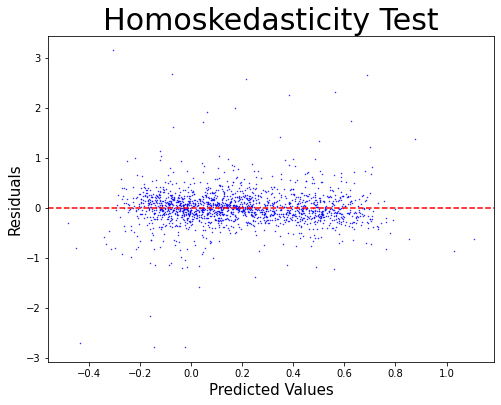

In [42]:
# Check condition 3
## Check 3a homoskedasticity - graphically or with the White-Test and Breusch-Pagan-Test
## Check 3b non-autocorrelation - Durbin-Watson-Test

# 3a - homoskedasticity
## Residuals-plot for growing variance detection
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(fittevals_pooled_OLS_cov, residuals_pooled_OLS_cov, color='blue', s=0.2)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Values', fontsize=15)
ax.set_ylabel('Residuals', fontsize=15)
ax.set_title('Homoskedasticity Test', fontsize=30)
plt.show()

### Explanation for above figure:

The residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing **variance** and thus, for **heteroskedasticity**. Since this seems to be the case, we might have the first violation.

We can check, if this is the case with the White and Breusch-Pagan-Test

In [43]:
# Breusch-Pagan-Test

## 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS_cov], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis=1).fillna(0)
exog = sm.tools.tools.add_constant(df['STATE_SHARE']).fillna(0)

white_test_results = het_white(pooled_OLS_dataset['residual'], exog)

labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, white_test_results)))

# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 1.7008762761676386, 'LM p-val': 0.4272277062078057, 'F-Stat': 0.849894237706002, 'F p-val': 0.4276121809529797}
{'LM-Stat': 0.05735841119905616, 'LM p-val': 0.8107208728341032, 'F-Stat': 0.05730360058463821, 'F p-val': 0.810833769167344}


# Results

```
{'LM-Stat': 0.6721144361758606, 'LM p-val': 0.714582217618135, 'F-Stat': 0.33567228869131954, 'F p-val': 0.7148970050370612}
{'LM-Stat': 0.6648784244684034, 'LM p-val': 0.41484294066168337, 'F-Stat': 0.6644416394520123, 'F p-val': 0.4150918170595629}
```

If p < 0.05, heteroskedasticity is indicated. Here, this is not the case.

## Checking for autocorrelation

In [44]:
# 3.B Non-autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])
print(durbin_watson_test_results)

1.8220170565658134


### Durbin-Watson

Has one output between 0-4, 
* the mean (=2) would indicate that there is no autocorrelation identified
* 0-2 means positive autocorrelation (the nearer to zero the higher the correlation)
* 2-4 means negative autocorrelation (the nearer to 4 the higher the correlation)

==> The result 0.74 indicates **strong positive autocorrelation**.

===> Assumption 3b is violated, so **FE/RE model** will be more suitable.

In [48]:
# Performing FE and RE with entity effects
from linearmodels.panel import RandomEffects, PanelOLS

exog = sm.tools.tools.add_constant(df[exog_vars])
endog = df['DELTA_LOANS']
# RE model
model_re = RandomEffects(endog, exog, check_rank=False)
re_res_new = model_re.fit()

# FE model
model_fe_new = PanelOLS(endog, exog, entity_effects=True, check_rank=False)
fe_res_new = model_fe_new.fit(drop_absorbed=True)

# results
print(re_res_new)
print("-----")
print(fe_res_new)


AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          const, STATE_SHARE, LN_Assets, DEPOSITS_ASSETS, PROFIT_BT_ASSETS, COST_TO_INCOME, EQUITY_ASSETS, LN_Los_res, Year.2006, Year.2007, Year.2008, Year.2009, Year.2010, Year.2011

Set drop_absorbed=True to automatically drop absorbed variables.


New resulst

```
                        RandomEffects Estimation Summary                        
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.8877
Estimator:              RandomEffects   R-squared (Between):              0.9267
No. Observations:                2033   R-squared (Within):               0.8175
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9241
Time:                        04:37:34   Log-likelihood                   -765.84
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1227.9
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,2019)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             926.70
                                        P-value                           0.0000
Time periods:                       7   Distribution:                 F(13,2019)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                  -0.0320     0.2589    -0.1237     0.9016     -0.5398      0.4757
STATE_SHARE             0.0006     0.0010     0.5844     0.5590     -0.0014      0.0026
DEPOSITS_ASSETS        -0.2619     0.0855    -3.0623     0.0022     -0.4296     -0.0942
PROFIT_BT_ASSETS       -0.0251     0.0073    -3.4227     0.0006     -0.0395     -0.0107
COST_TO_INCOME         -0.0018     0.0007    -2.4938     0.0127     -0.0032     -0.0004
EQUITY_ASSETS           0.7134     0.1713     4.1646     0.0000      0.3774      1.0493
LLOSS_RES_ON_GLOANS    -0.0531     0.0017    -31.815     0.0000     -0.0564     -0.0498
SIZE                    0.9778     0.0129     75.775     0.0000      0.9525      1.0031
Year.2006               0.0491     0.0328     1.4960     0.1348     -0.0153      0.1135
Year.2007               0.1154     0.0353     3.2667     0.0011      0.0461      0.1846
Year.2008               0.2562     0.0400     6.4040     0.0000      0.1778      0.3347
Year.2009               0.2027     0.0433     4.6794     0.0000      0.1177      0.2876
Year.2010               0.1582     0.0441     3.5921     0.0003      0.0718      0.2446
Year.2011               0.2005     0.0450     4.4546     0.0000      0.1122      0.2888
=======================================================================================
-----
                          PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.8187
Estimator:                   PanelOLS   R-squared (Between):              0.9201
No. Observations:                2033   R-squared (Within):               0.8187
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9187
Time:                        04:37:34   Log-likelihood                   -560.01
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      582.98
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,1678)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             582.98
                                        P-value                           0.0000
Time periods:                       7   Distribution:                 F(13,1678)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   0.7116     0.3928     1.8114     0.0703     -0.0589      1.4820
STATE_SHARE             0.0007     0.0012     0.5606     0.5752     -0.0017      0.0030
DEPOSITS_ASSETS        -0.2116     0.0931    -2.2732     0.0231     -0.3943     -0.0290
PROFIT_BT_ASSETS       -0.0198     0.0075    -2.6321     0.0086     -0.0345     -0.0050
COST_TO_INCOME         -0.0014     0.0007    -1.8658     0.0622     -0.0028   7.059e-05
EQUITY_ASSETS           0.8925     0.1979     4.5108     0.0000      0.5044      1.2806
LLOSS_RES_ON_GLOANS    -0.0546     0.0018    -31.013     0.0000     -0.0580     -0.0511
SIZE                    0.9306     0.0206     45.267     0.0000      0.8903      0.9709
Year.2006               0.0875     0.0344     2.5421     0.0111      0.0200      0.1550
Year.2007               0.1843     0.0404     4.5598     0.0000      0.1050      0.2636
Year.2008               0.3141     0.0445     7.0518     0.0000      0.2267      0.4015
Year.2009               0.2737     0.0490     5.5812     0.0000      0.1775      0.3698
Year.2010               0.2427     0.0510     4.7588     0.0000      0.1427      0.3428
Year.2011               0.2931     0.0529     5.5395     0.0000      0.1893      0.3969
=======================================================================================

F-test for Poolability: 13.065
P-value: 0.0000
Distribution: F(341,1678)

Included effects: Entity

```

In [49]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re, df):
    """ Performs the Hausman-Test """
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov

    df = b[np.abs(b) < 1e8].size

    chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b-B))

    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval

In [189]:
hausman_results = hausman(fe_res_new, re_res_new, df)
print('Chi-Squared: ', str(hausman_results[0]))
print("Degrees of freedom: ", str(hausman_results[1]))
print("p-Value: ", str(hausman_results[2]))

Chi-Squared:  55.709559246825116
Degrees of freedom:  14
p-Value:  6.53657138687744e-07


## Huasman interpretation

Since the p-value is very small

```
Chi-Squared:  55.709559246825116
Degrees of freedom:  14
p-Value:  6.53657138687744e-07
```

the null hypothesis can be rejected. Therefore, the FE-model seems to be the most suitable, because we have endogeneity in our model.

==> To model endogeneity we could now perform regression models like 2SLS (2 State Least Squares) in which instrument variables help to deal with endogeneity.

## Esitmating parameters with uncorrelated effects

### Random effects

In [190]:
from linearmodels.panel import RandomEffects

In [191]:
mod = RandomEffects(df.LOG_LOANS, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              LOG_LOANS   R-squared:                        0.8877
Estimator:              RandomEffects   R-squared (Between):              0.9267
No. Observations:                2033   R-squared (Within):               0.8175
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9241
Time:                        04:45:52   Log-likelihood                   -765.84
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1227.9
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,2019)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             926.70
                            

### Random effects output:

```
                        RandomEffects Estimation Summary                        
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.8877
Estimator:              RandomEffects   R-squared (Between):              0.9267
No. Observations:                2033   R-squared (Within):               0.8175
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9241
Time:                        03:52:07   Log-likelihood                   -765.84
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1227.9
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,2019)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             926.70
                                        P-value                           0.0000
Time periods:                       7   Distribution:                 F(13,2019)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                  -0.0320     0.2589    -0.1237     0.9016     -0.5398      0.4757
STATE_SHARE             0.0006     0.0010     0.5844     0.5590     -0.0014      0.0026
DEPOSITS_ASSETS        -0.2619     0.0855    -3.0623     0.0022     -0.4296     -0.0942
PROFIT_BT_ASSETS       -0.0251     0.0073    -3.4227     0.0006     -0.0395     -0.0107
COST_TO_INCOME         -0.0018     0.0007    -2.4938     0.0127     -0.0032     -0.0004
EQUITY_ASSETS           0.7134     0.1713     4.1646     0.0000      0.3774      1.0493
LLOSS_RES_ON_GLOANS    -0.0531     0.0017    -31.815     0.0000     -0.0564     -0.0498
SIZE                    0.9778     0.0129     75.775     0.0000      0.9525      1.0031
Year.2006               0.0491     0.0328     1.4960     0.1348     -0.0153      0.1135
Year.2007               0.1154     0.0353     3.2667     0.0011      0.0461      0.1846
Year.2008               0.2562     0.0400     6.4040     0.0000      0.1778      0.3347
Year.2009               0.2027     0.0433     4.6794     0.0000      0.1177      0.2876
Year.2010               0.1582     0.0441     3.5921     0.0003      0.0718      0.2446
Year.2011               0.2005     0.0450     4.4546     0.0000      0.1122      0.2888
=======================================================================================
```

In [192]:
# Variance decomposition
re_res.variance_decomposition

Effects                   0.277083
Residual                  0.123064
Percent due to Effects    0.692453
Name: Variance Decomposition, dtype: float64

In [193]:
# Theta determines how much demeaning takes place. When theta == 1, RE reduces to the pooled model since this occurs, when there's no variance in the effects.
## These will vary across entities, because the panel isn't balanced, i.e, there's more observations for some banks than others.
re_res.theta.head()

,theta
Bank,
201,0.755740
202,0.755740
203,0.737471
204,0.755740
205,0.755740


In [194]:
from linearmodels.panel import BetweenOLS
exog_vars_be = [x for x in exog_vars if x!="Year"]
exog = sm.add_constant(df[exog_vars_be])
mod = BetweenOLS(df.LOG_LOANS, exog)
be_res = mod.fit()
print(be_res)


                         BetweenOLS Estimation Summary                          
Dep. Variable:              LOG_LOANS   R-squared:                        0.9345
Estimator:                 BetweenOLS   R-squared (Between):              0.9345
No. Observations:                 342   R-squared (Within):               0.7472
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9226
Time:                        04:45:55   Log-likelihood                   -273.24
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      680.44
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                   F(7,334)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             680.44
                            

## Between OLS results
```
                         BetweenOLS Estimation Summary                          
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.9345
Estimator:                 BetweenOLS   R-squared (Between):              0.9345
No. Observations:                 342   R-squared (Within):               0.7472
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9226
Time:                        04:45:55   Log-likelihood                   -273.24
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      680.44
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                   F(7,334)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             680.44
                                        P-value                           0.0000
Time periods:                       7   Distribution:                   F(7,334)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   1.1738     0.5583     2.1023     0.0363      0.0755      2.2720
STATE_SHARE            -0.0003     0.0018    -0.1639     0.8699     -0.0039      0.0033
DEPOSITS_ASSETS        -0.6465     0.2128    -3.0382     0.0026     -1.0650     -0.2279
PROFIT_BT_ASSETS       -0.0941     0.0301    -3.1310     0.0019     -0.1532     -0.0350
COST_TO_INCOME         -0.0106     0.0030    -3.5468     0.0004     -0.0165     -0.0047
EQUITY_ASSETS          -0.8220     0.3964    -2.0738     0.0389     -1.6018     -0.0423
LLOSS_RES_ON_GLOANS    -0.0390     0.0050    -7.7640     0.0000     -0.0489     -0.0291
SIZE                    0.9832     0.0196     50.120     0.0000      0.9446      1.0218
=======================================================================================

```

## Handling correlated effects

When effects are correlated with the regressors the RE and BE estimators are not consistent. The usual solution is to use Fixed Effects.

In [195]:
# Time invariant variables shouldn't be included when using entity effects since once demeaned, these will all be 0.
from linearmodels.panel import PanelOLS
exog_vars = [x for x in exog_vars if x!= "Year"]
exog = sm.add_constant(df[exog_vars])
mod = PanelOLS(df.LOG_LOANS, exog, entity_effects=True)

fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              LOG_LOANS   R-squared:                        0.8125
Estimator:                   PanelOLS   R-squared (Between):              0.9245
No. Observations:                2033   R-squared (Within):               0.8125
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9222
Time:                        04:46:33   Log-likelihood                   -594.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1042.7
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                  F(7,1684)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             1042.7
                            

## Including fixed effects
```
                          PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.8125
Estimator:                   PanelOLS   R-squared (Between):              0.9245
No. Observations:                2033   R-squared (Within):               0.8125
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9222
Time:                        04:46:33   Log-likelihood                   -594.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1042.7
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                  F(7,1684)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             1042.7
                                        P-value                           0.0000
Time periods:                       7   Distribution:                  F(7,1684)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                  -0.9430     0.2864    -3.2927     0.0010     -1.5047     -0.3813
STATE_SHARE             0.0001     0.0012     0.1219     0.9030     -0.0022      0.0025
DEPOSITS_ASSETS        -0.2381     0.0920    -2.5892     0.0097     -0.4184     -0.0577
PROFIT_BT_ASSETS       -0.0187     0.0075    -2.4906     0.0128     -0.0335     -0.0040
COST_TO_INCOME          0.0012     0.0006     2.1258     0.0337   9.654e-05      0.0024
EQUITY_ASSETS           1.2173     0.1937     6.2837     0.0000      0.8373      1.5973
LLOSS_RES_ON_GLOANS    -0.0527     0.0017    -31.526     0.0000     -0.0560     -0.0495
SIZE                    1.0175     0.0138     73.516     0.0000      0.9903      1.0446
=======================================================================================

F-test for Poolability: 12.732
P-value: 0.0000
Distribution: F(341,1684)

Included effects: Entity

```

# Choosing between the models
[Source](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)

There are 5 assumptions for simple linear regression models that must be fulfilled. 2 of them can help us in choosing between PooledOLS and FE/RE

1. Linearity
2. Exogeneity
3a. Homoskedasticity
3b. Non-autocorrelation
4. Independent variables are not Stochastic
5. No multicollinearity

* If 2. or 3. or both are violated, FE or RE might be more suitable.
    * Choosing between FE and RE: Depends on your assumption, if the individual, unobserved *heterogeneity* is a *constant* or a *random effect*
        * ==> Can be answered by performing the Hausman-Test
            * Null hypothesis that the covariance between the independent variables (IVs) and alpha are zero. If this is the case, RE is preferred. Otherwise, FE model is preferred.





# Correlation matrix

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    """
    Creates a heatmap of correlations between featuers in the df.
    Figure size can be adjusted.
    """
    # Set style
    sns.set(style="white")

    # Create covariance matrix
    corr = df.corr()

    # Generate a mask teh size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


C:\Users\arika\AppData\Local\Temp/ipykernel_3840/20349536.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


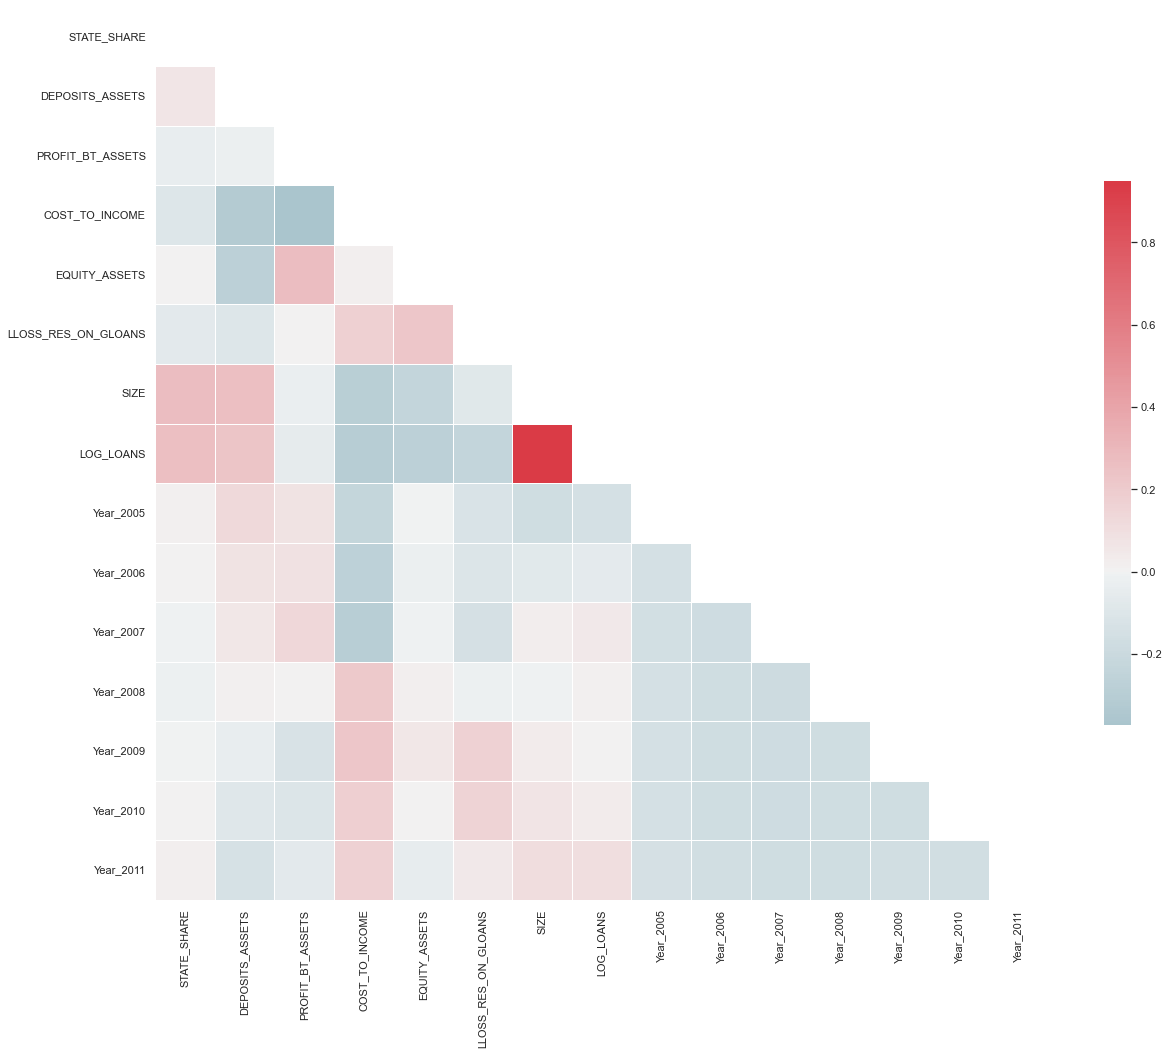

In [204]:
# One-hot encodes categorical variables
transformed_df = pd.get_dummies(df)
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

C:\Users\arika\AppData\Local\Temp/ipykernel_3840/20349536.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


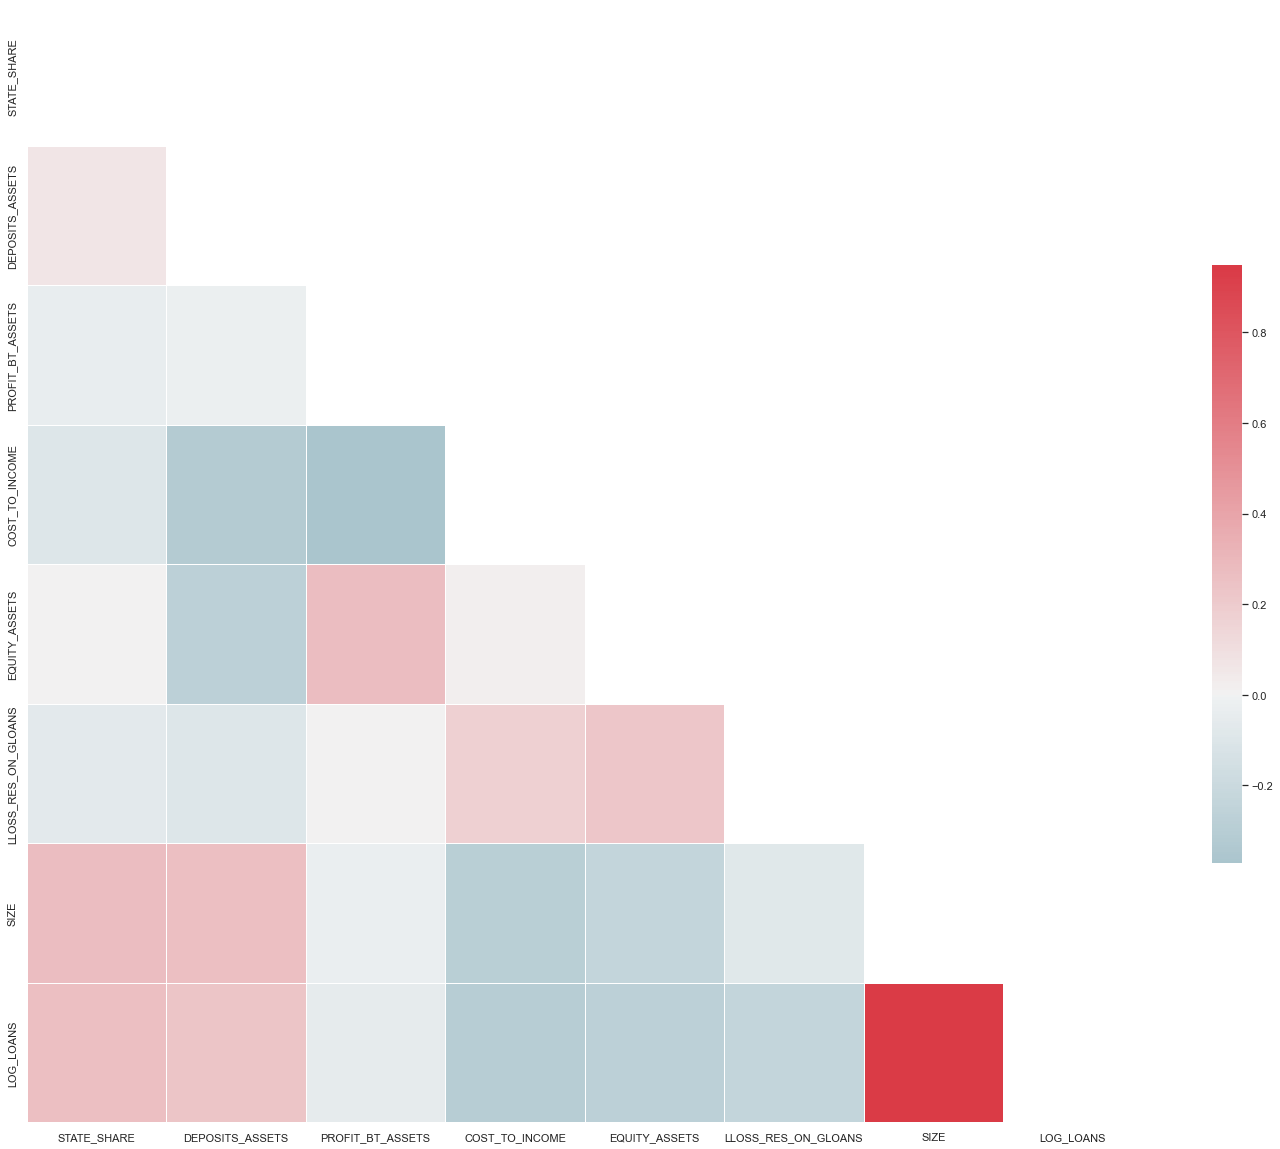

In [205]:
# Drop years to create a clearer heatmap
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Year')]), axis=1), figsize=(25,22))


In [206]:
# Compare different models
from linearmodels.panel import compare
print(compare({"Pooled": pooled_res, "Random Effects": re_res, "Between OLS": be_res, "Fixed Effects": fe_res_new, "Random Effects New": re_res_new}))


                                             Model Comparison                                            
                                Pooled    Random Effects    Between OLS  Fixed Effects Random Effects New
---------------------------------------------------------------------------------------------------------
Dep. Variable                LOG_LOANS         LOG_LOANS      LOG_LOANS      LOG_LOANS          LOG_LOANS
Estimator                    PooledOLS     RandomEffects     BetweenOLS       PanelOLS      RandomEffects
No. Observations                  2033              2033            342           2033               2033
Cov. Est.                   Unadjusted        Unadjusted     Unadjusted     Unadjusted         Unadjusted
R-squared                       0.9274            0.8877         0.9345         0.8187             0.8877
R-Squared (Within)              0.8034            0.8175         0.7472         0.8187             0.8175
R-Squared (Between)             0.9328        

# Model comparisons
* [Source](https://bashtage.github.io/linearmodels/panel/examples/examples.html#Comparing-models)

```
                                             Model Comparison                                            
=========================================================================================================
                                Pooled    Random Effects    Between OLS  Fixed Effects Random Effects New
---------------------------------------------------------------------------------------------------------
Dep. Variable                LOG_LOANS         LOG_LOANS      LOG_LOANS      LOG_LOANS          LOG_LOANS
Estimator                    PooledOLS     RandomEffects     BetweenOLS       PanelOLS      RandomEffects
No. Observations                  2033              2033            342           2033               2033
Cov. Est.                   Unadjusted        Unadjusted     Unadjusted     Unadjusted         Unadjusted
R-squared                       0.9274            0.8877         0.9345         0.8187             0.8877
R-Squared (Within)              0.8034            0.8175         0.7472         0.8187             0.8175
R-Squared (Between)             0.9328            0.9267         0.9345         0.9201             0.9267
R-Squared (Overall)             0.9274            0.9241         0.9226         0.9187             0.9241
F-statistic                     1984.6            1227.9         680.44         582.98             1227.9
P-value (F-stat)                0.0000            0.0000         0.0000         0.0000             0.0000
=====================     ============   ===============   ============   ============    ===============
const                           0.2251           -0.0320         1.1738         0.7116            -0.0320
                              (1.1318)         (-0.1237)       (2.1023)       (1.8114)          (-0.1237)
STATE_SHARE                    -0.0002            0.0006        -0.0003         0.0007             0.0006
                             (-0.2616)          (0.5844)      (-0.1639)       (0.5606)           (0.5844)
DEPOSITS_ASSETS                -0.4799           -0.2619        -0.6465        -0.2116            -0.2619
                             (-5.7584)         (-3.0623)      (-3.0382)      (-2.2732)          (-3.0623)
PROFIT_BT_ASSETS               -0.0575           -0.0251        -0.0941        -0.0198            -0.0251
                             (-5.8556)         (-3.4227)      (-3.1310)      (-2.6321)          (-3.4227)
COST_TO_INCOME                 -0.0054           -0.0018        -0.0106        -0.0014            -0.0018
                             (-5.5257)         (-2.4938)      (-3.5468)      (-1.8658)          (-2.4938)
EQUITY_ASSETS                  -0.2281            0.7134        -0.8220         0.8925             0.7134
                             (-1.3727)          (4.1646)      (-2.0738)       (4.5108)           (4.1646)
LLOSS_RES_ON_GLOANS            -0.0463           -0.0531        -0.0390        -0.0546            -0.0531
                             (-24.647)         (-31.815)      (-7.7640)      (-31.013)          (-31.815)
SIZE                            0.9971            0.9778         0.9832         0.9306             0.9778
                              (122.30)          (75.775)       (50.120)       (45.267)           (75.775)
Year.2006                       0.0075            0.0491                        0.0875             0.0491
                              (0.1389)          (1.4960)                      (2.5421)           (1.4960)
Year.2007                       0.0529            0.1154                        0.1843             0.1154
                              (0.9928)          (3.2667)                      (4.5598)           (3.2667)
Year.2008                       0.2457            0.2562                        0.3141             0.2562
                              (4.1735)          (6.4040)                      (7.0518)           (6.4040)
Year.2009                       0.1490            0.2027                        0.2737             0.2027
                              (2.4274)          (4.6794)                      (5.5812)           (4.6794)
Year.2010                       0.0917            0.1582                        0.2427             0.1582
                              (1.5026)          (3.5921)                      (4.7588)           (3.5921)
Year.2011                       0.1403            0.2005                        0.2931             0.2005
                              (2.2837)          (4.4546)                      (5.5395)           (4.4546)
======================= ============== ================= ============== ==============  =================
Effects                                                                         Entity                   
---------------------------------------------------------------------------------------------------------

T-stats reported in parentheses
```

## Descriptive statistics
* [Example](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02)

In [16]:
df_desc = df.copy()

In [ ]:
# Group by and get means
df_desc = df_desc.groupby([''])

In [10]:
print(df.describe)

<bound method NDFrame.describe of            STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
Bank Year                                                             
201  2005    63.760000  6.209636e+07  8.731443e+07         0.830049   
     2006    63.800000  9.652529e+07  1.316570e+08         0.828939   
     2007    60.300000  1.597618e+08  2.007972e+08         0.803022   
     2008    61.580000  1.728323e+08  2.292849e+08         0.756741   
     2009    60.750000  1.608252e+08  2.349233e+08         0.790621   
     2010    60.300000  1.801163e+08  2.831169e+08         0.806509   
     2011    60.300000  2.397713e+08  3.365345e+08         0.803734   
202  2005    99.900000  2.033875e+07  3.748806e+07         0.615941   
     2006    99.900000  3.264960e+07  5.847458e+07         0.613496   
     2007    77.500000  7.008009e+07  1.108400e+08         0.560334   
     2008    77.470000  8.698316e+07  1.258458e+08         0.403121   
     2009    85.500000  7.637497e+07  1.193

In [8]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

In [9]:
exog_vars = ["LOANS", "ASSETS", "DEPOSITS_ASSETS", "PROFIT_BT_ASSETS", "COST_TO_INCOME", "EQUITY_ASSETS"]
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.STATE_SHARE, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            STATE_SHARE   R-squared:                        0.1131
Estimator:                  PooledOLS   R-squared (Between):              0.1321
No. Observations:                2033   R-squared (Within):              -0.1680
Date:                Thu, Mar 10 2022   R-squared (Overall):              0.1131
Time:                        11:07:48   Log-likelihood                   -8631.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      43.072
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                  F(6,2026)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             43.072
                            

In [10]:
df.describe

<bound method NDFrame.describe of            STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
Bank Year                                                             
201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
     2006        63.80  9.652529e+07  1.316570e+08         0.828939   
     2007        60.30  1.597618e+08  2.007972e+08         0.803022   
     2008        61.58  1.728323e+08  2.292849e+08         0.756741   
     2009        60.75  1.608252e+08  2.349233e+08         0.790621   
...                ...           ...           ...              ...   
547  2010         0.00  4.750348e+04  3.867721e+05         0.732015   
548  2008         0.00  4.584689e+04  3.056119e+05         0.414634   
     2009         0.00  3.274292e+04  2.799145e+05         0.335238   
     2010         0.00  3.412420e+04  3.199472e+05         0.429700   
     2011         0.00  8.429592e+04  4.002969e+05         0.592644   

           PROFIT_BT_ASSETS  COST_TO_INCOM

In [25]:
df

,Bank,Year,STATE_SHARE,LOANS,ASSETS,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS
0,201,2005,63.76,6.209636e+07,8.731443e+07,0.830049,3.486552,51.613,0.091945,4.950
1,201,2006,63.80,9.652529e+07,1.316570e+08,0.828939,3.144802,54.839,0.088997,3.817
2,201,2007,60.30,1.597618e+08,2.007972e+08,0.803022,2.835351,55.434,0.129280,2.764
3,201,2008,61.58,1.728323e+08,2.292849e+08,0.756741,1.928618,49.997,0.130086,3.831
4,201,2009,60.75,1.608252e+08,2.349233e+08,0.790621,0.420320,34.302,0.127377,10.651
...,...,...,...,...,...,...,...,...,...,...
2028,547,2010,0.00,4.750348e+04,3.867721e+05,0.732015,1.515302,92.842,0.049501,32.124
2029,548,2008,0.00,4.584689e+04,3.056119e+05,0.414634,1.403274,92.746,0.360396,17.615
2030,548,2009,0.00,3.274292e+04,2.799145e+05,0.335238,0.607977,99.060,0.395550,23.347
2031,548,2010,0.00,3.412420e+04,3.199472e+05,0.429700,2.133115,88.419,0.344067,23.754


In [26]:
df = df.pivot_table(
    values=[
        'STATE_SHARE',
        'LOANS', 'ASSETS',
        'DEPOSITS_ASSETS',
        'PROFIT_BT_ASSETS',
        'COST_TO_INCOME',
        'EQUITY_ASSETS',
        'LLOSS_RES_ON_GLOANS'
    ],
    index='Year',
    columns='Bank'
   
)

In [27]:
df

ASSETS                                                          \
Bank           201           202           203           204           205   
Year                                                                         
2005  8.731443e+07  3.748806e+07  1.534537e+07  1.981583e+06  1.791255e+06   
2006  1.316570e+08  5.847458e+07  2.942247e+07  7.009984e+06  6.040211e+06   
2007  2.007972e+08  1.108400e+08  3.864236e+07  1.452201e+07  1.301166e+07   
2008  2.292849e+08  1.258458e+08           NaN  2.427176e+07  2.030201e+07   
2009  2.349233e+08  1.193882e+08  5.756945e+07  2.746523e+07  2.357387e+07   
2010  2.831169e+08  1.407919e+08  6.403607e+07  3.054116e+07  2.966368e+07   
2011  3.365345e+08  2.108827e+08  7.695553e+07  3.989384e+07  3.655694e+07   

                                                                            \
Bank           207           208           209           210           211   
Year                                                                         
2005  8.538849e+06           NaN  7.402297e+06  2.971149e+06  4.694603e+06   
2006  1.450596e+07  9.376737e+06  1.115926e+07  4.158759e+06  1.136357e+07   
2007  2.151397e+07  1.499015e+07  1.662429e+07  8.107161e+06  1.809779e+07   
2008  2.727619e+07  2.027746e+07  1.724119e+07  9.455120e+06  2.107935e+07   
2009  2.728490e+07  1.594730e+07  1.525955e+07  9.162454e+06  1.695057e+07   
2010           NaN  1.886696e+07  1.491697e+07  1.739733e+07  1.667836e+07   
2011  3.292353e+07  2.397734e+07  2.315532e+07  2.056597e+07  1.879378e+07   

      ... STATE_SHARE                                               
Bank  ...         539  540  541  542  543  544  545  546  547  548  
Year  ...                                                           
2005  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2006  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2007  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2008  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2010  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2011  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  

[7 rows x 2736 columns]

In [28]:
years = df.index.get_level_values('Year').to_list()

In [30]:
df['Year'] = pd.Categorical(years)

In [31]:
df

ASSETS                                                          \
Bank           201           202           203           204           205   
Year                                                                         
2005  8.731443e+07  3.748806e+07  1.534537e+07  1.981583e+06  1.791255e+06   
2006  1.316570e+08  5.847458e+07  2.942247e+07  7.009984e+06  6.040211e+06   
2007  2.007972e+08  1.108400e+08  3.864236e+07  1.452201e+07  1.301166e+07   
2008  2.292849e+08  1.258458e+08           NaN  2.427176e+07  2.030201e+07   
2009  2.349233e+08  1.193882e+08  5.756945e+07  2.746523e+07  2.357387e+07   
2010  2.831169e+08  1.407919e+08  6.403607e+07  3.054116e+07  2.966368e+07   
2011  3.365345e+08  2.108827e+08  7.695553e+07  3.989384e+07  3.655694e+07   

                                                                            \
Bank           207           208           209           210           211   
Year                                                                         
2005  8.538849e+06           NaN  7.402297e+06  2.971149e+06  4.694603e+06   
2006  1.450596e+07  9.376737e+06  1.115926e+07  4.158759e+06  1.136357e+07   
2007  2.151397e+07  1.499015e+07  1.662429e+07  8.107161e+06  1.809779e+07   
2008  2.727619e+07  2.027746e+07  1.724119e+07  9.455120e+06  2.107935e+07   
2009  2.728490e+07  1.594730e+07  1.525955e+07  9.162454e+06  1.695057e+07   
2010           NaN  1.886696e+07  1.491697e+07  1.739733e+07  1.667836e+07   
2011  3.292353e+07  2.397734e+07  2.315532e+07  2.056597e+07  1.879378e+07   

      ... STATE_SHARE                                          Year  
Bank  ...         540  541  542  543  544  545  546  547  548        
Year  ...                                                            
2005  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2005  
2006  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2006  
2007  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2007  
2008  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2008  
2009  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2009  
2010  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2010  
2011  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  2011  

[7 rows x 2737 columns]

In [32]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [35]:
exog = sm.tools.tools.add_constant(df['STATE_SHARE'])
endog = df['LOANS']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

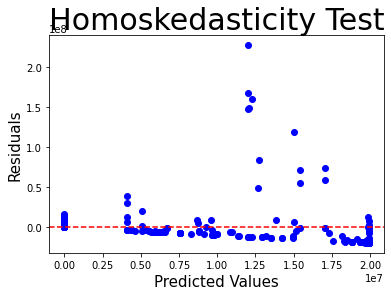

In [37]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [14]:
dataset = pd.read_csv(
    'RIFA-Data2016.csv',
    usecols=[
        'STATE_SHARE',
        'LOANS', 'ASSETS',
        'DEPOSITS_ASSETS',
        'PROFIT_BT_ASSETS',
        'COST_TO_INCOME',
        'EQUITY_ASSETS',
        'LLOSS_RES_ON_GLOANS'
    ], index_col=['Bank', 'Year']
)


In [15]:
dataset

,Bank,Year,STATE_SHARE,LOANS,ASSETS,DEPOSITS_ASSETS,PROFIT_BT_ASSETS,COST_TO_INCOME,EQUITY_ASSETS,LLOSS_RES_ON_GLOANS
0,201,2005,63.76,62 096 356.32,87 314 430.88,0.83,3.49,51.61,0.09,4.95
1,201,2006,63.80,96 525 286.64,131 656 974.68,0.83,3.14,54.84,0.09,3.82
2,201,2007,60.30,159 761 834.08,200 797 187.11,0.80,2.84,55.43,0.13,2.76
3,201,2008,61.58,172 832 301.67,229 284 904.45,0.76,1.93,50.00,0.13,3.83
4,201,2009,60.75,160 825 246.60,234 923 254.31,0.79,0.42,34.30,0.13,10.65
...,...,...,...,...,...,...,...,...,...,...
2028,547,2010,0.00,47 503.48,386 772.06,0.73,1.52,92.84,0.05,32.12
2029,548,2008,0.00,45 846.89,305 611.91,0.41,1.40,92.75,0.36,17.62
2030,548,2009,0.00,32 742.92,279 914.51,0.34,0.61,99.06,0.40,23.35
2031,548,2010,0.00,34 124.20,319 947.23,0.43,2.13,88.42,0.34,23.75
